# 가위바위보 분류기를 만들기

## 1. 필요한 라이브러리 가져오기

#### 1) 인공신경망 
- import tensorflow as tf
- from tensorflow import keras 

#### 2) numpy배열
- import numpy as np

#### 3) 특정 확장자를 가져오기 
- import glob

#### 4) 환경변수(운영체제에서 설정한 변수) 가져오기
- import os

#### 5) image 처리(resize)
- from PIL import Image

#### 6) 이미지 불러오기, 그래프 그리기
- import matplotlib.pyplot as plt

#### 7) 훈련세트, 테스트세트 나누기
- from sklearn.model_selection import train_test_split

In [27]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import glob
import os


from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## 2. 이미지 사이즈 변경하기

### 1) 가위 이미지 사이즈 변경하기

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

3000  images to be resized.
3000  images resized.
가위 이미지 resize 완료!


### 2) 바위 이미지 사이즈 변경하기

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

3000  images to be resized.
3000  images resized.
바위 이미지 resize 완료!


### 3) 보 이미지 사이즈 변경하기

In [4]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

3000  images to be resized.
3000  images resized.
보 이미지 resize 완료!


## 3. 가위바위보의 경우 3개의 클래스 -> 가위: 0, 바위: 1, 보: 2 로 라벨링

In [28]:

def load_data(img_path, number_of_data=9000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


## 4. 이미지 정규화 - 0 ~ 1사이의 값 만들기

In [29]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

# 정규화
x_train_norm = x_train / 255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9000 입니다.
x_train shape: (9000, 56, 56, 3)
y_train shape: (9000,)


## 5. train_test_split를 이용해서 훈련세트, 검증세트, 테스트세트로 나누기

- 훈련(80%), 검증(20%), 테스트(20%) 나누기

In [30]:
# 훈련세트:80%, 테스트세트:20%
x_train, X_test, yy_train, Y_test = train_test_split(x_train_norm, y_train, test_size=0.2, random_state=42) 

# 훈련세트에서 훈련세트, 검증세트 나누기
X_train, x_val, Y_train, y_val = train_test_split(x_train, yy_train, test_size=0.25, random_state=42)

print(f"X_train 배열구조 : {X_train.shape}, Y_train 배열구조 : {Y_train.shape}")
print(f"x_val 배열구조 : {x_val.shape}, x_val 배열구조 : {x_val.shape}")

X_train 배열구조 : (5400, 56, 56, 3), Y_train 배열구조 : (5400,)
x_val 배열구조 : (1800, 56, 56, 3), x_val 배열구조 : (1800, 56, 56, 3)


## 6.이미지, 라벨링 확인하기

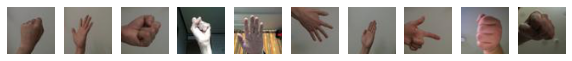

Y_train 라벨 : [1, 2, 1, 1, 2, 2, 2, 0, 1, 1]


In [36]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i])
    axs[i].axis('off')
plt.show()

print("Y_train 라벨 :", [Y_train[i] for i in range(10)])

## 7.딥러닝 모델 설계하기

In [37]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  12
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 54, 54, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          

## 8.딥러닝 모델 학습시키기

In [38]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
169/169 [==============================] - 1s 5ms/step - loss: 1.0041 - accuracy: 0.4533
Epoch 2/10
169/169 [==============================] - 1s 5ms/step - loss: 0.6090 - accuracy: 0.7443
Epoch 3/10
169/169 [==============================] - 1s 5ms/step - loss: 0.2421 - accuracy: 0.9163
Epoch 4/10
169/169 [==============================] - 1s 5ms/step - loss: 0.1129 - accuracy: 0.9611
Epoch 5/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0686 - accuracy: 0.9759
Epoch 6/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0446 - accuracy: 0.9837
Epoch 7/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0465 - accuracy: 0.9854
Epoch 8/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0305 - accuracy: 0.9900
Epoch 9/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 10/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.9991

## 9. 검증용 테이터 정확도 확인

In [39]:
# 검증용 데이터(xval)를 가지고 확인
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose=2)
print("val_loss: {} ".format(test_loss))
print("val_accuracy: {}".format(test_accuracy))

57/57 - 0s - loss: 0.0287 - accuracy: 0.9939
val_loss: 0.028735343366861343 
val_accuracy: 0.9938889145851135


## 10. 테스트용 정확도 확인

In [40]:
# 시험용 데이터(x_test)를 가지고 확인
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

57/57 - 0s - loss: 0.0308 - accuracy: 0.9911
test_loss: 0.030808543786406517 
test_accuracy: 0.9911110997200012



# 회고

## 어려웠던 점
- 데이터의 수가 적으니 다른 방법을 찾아야 하는 데, 아직 구글링이 부족해서.. 찾아도 눈팅만 한다.
   - 이유는 파이썬이 아직 잘 안된다.. .ㅡ.ㅡ
   

## 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
- 알아낸 것 
   - os, glob의 사용법, verbose파라미터
- 모호한 점
   - 컬러이미지는 교차검증을 할 수 없나?
   - 컬러이미지를 흑백으로 어떻게 바꾸지??
   

## 루브릭 평가 지표를 맞추기 위해 시도한 것들
" 많은 시행 착오가 있었다.."

### 1. 예제처럼 28*28, 전체 300장으로 훈련하고, 다른 멤버들의 데이터로 테스트하니 정확도가 0.3 근처로 나왔다..
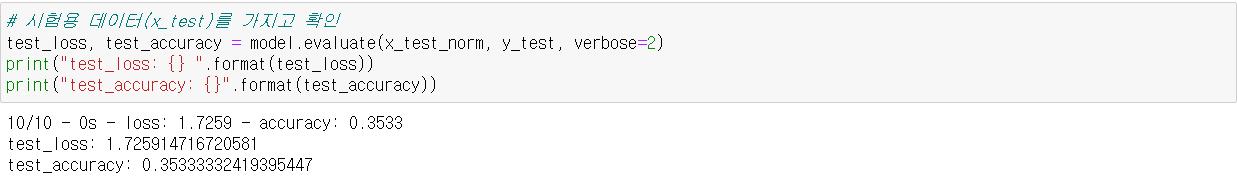

아~~ 좌절!!!

### 2. 사진 화질이 좋지 않으가 보다.. 사진들을 다시 지우고 80*80으로 리사이즈 후 훈련...
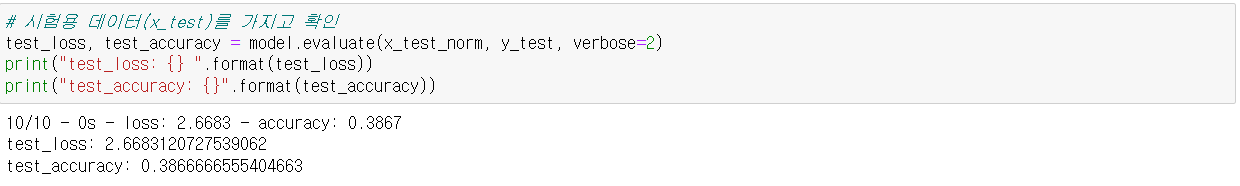
0.1 상승 아직 멀었다....

### 3. 조금 올라갔으니 조금 더 키워볼까?? 사진들을 다시 지우고 100*100으로 리사이즈 후 훈련...
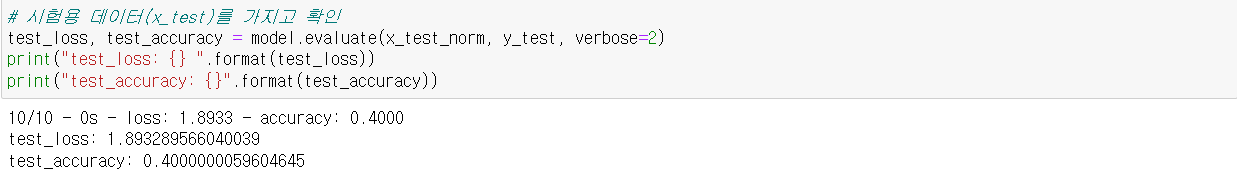
0.4까지 갔다.. 더 이상 오르지는 않는다. ㅡ.ㅡ

### 4. 데이터의 수를 3600으로 늘이자.. 다신 사진 지우고 다시 알집을 풀었다.
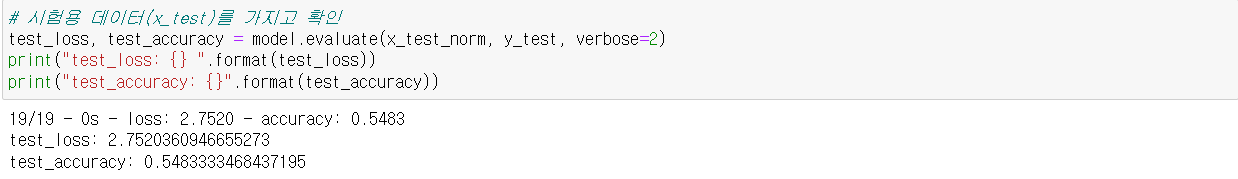
오호~~ 0.6 근처다.. 고지가 보여...

### 5. 하지만  0.6을 넘기지 못한다.. 그래서 모델을 손보자.. dropout을 해서 과적합을 줄일까??
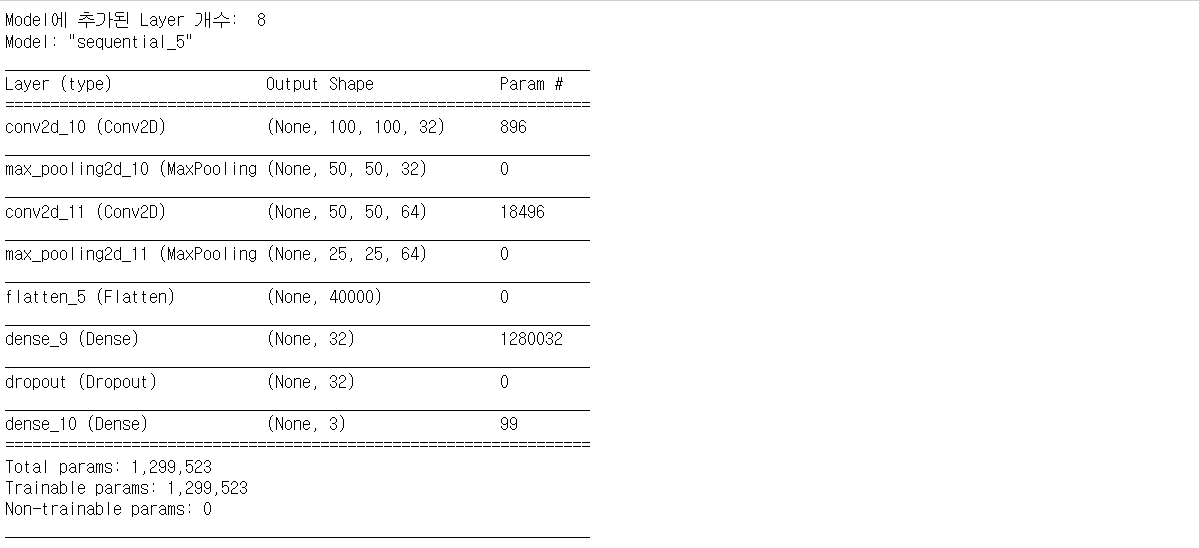
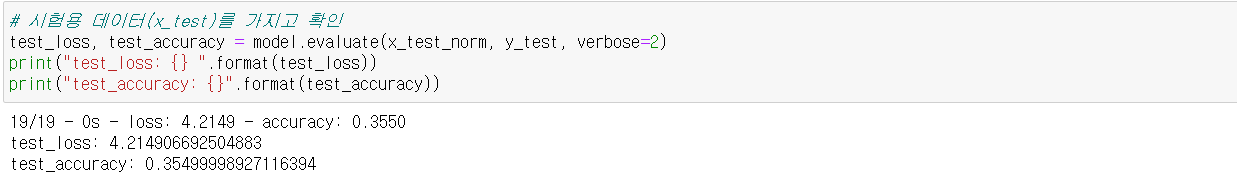
다시 원상복구하넹... 데이터가 작고, 이미지 사이즈가 작아서 인가보다...

### 6. (56,56), 4500장을 훈련하고, (56,56) 600장을 테스트 했다..
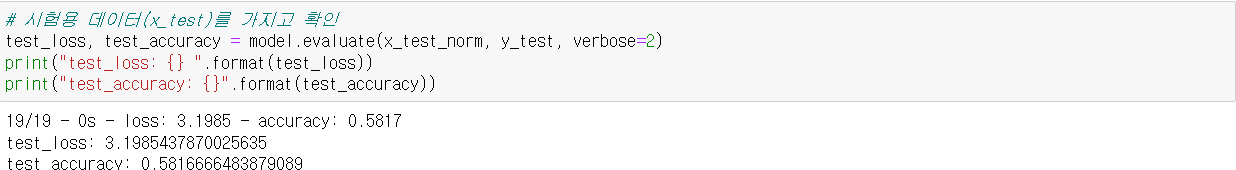
정확도가 정신이 없다.. 너무나 편차가 심하다..
모델 돌리고 정확도 보고 ctrl+enter하기도 너무 귀찮다... ㅜ.ㅜ

### 7. 그래서 찾아보았다. 작은 데이터를 가지고 정확도를 올릴 수 있는 방법을..
- 이미지증강 : 파이썬이 어려워 쳐다보기만 했는 데.. 마감일이 다됐다.. 작은 데이터로 도전해 볼 예정이다.. 예정만..
- 검증 세트 만들기  
    - 내가 만들고 싶었던 것은 교차검증이었는 데, 교차검증은 채널수의 제한이 있나? 흑백이미지로 어떻게 바꾸지?? -> 찾지 못함.
- 차원축소 : 차원을 줄이면 좀 괜찮을까?? 아~ 이것도 일요일 12시 넘어서... ㅜ.ㅜ 포기

## 1~7은 훈련, 테스트 데이터를 따로 만들어서 전혀 다른 데이터로 했더니 정확도가 정신이 없다.. 


### 8. 다른 분들의 조언을 들으니 훈련데이터에서 검증, 테스트 데이터를 하니 정확도가 올라간다..

물론, 사진들을 다 지우고 다시 세팅하고.... 이번에는 9000장에서 3:1:!비율로 데이터를 나눴다..<br>
정확도가 너무 좋다.. ㅎㅎㅎ<br>
모델을 건드린 것은 여기 서버는 좋으니 용량이 넘쳐나도 잘 될거야~~ !! ㅎㅎㅎ


## 자기다짐
- 주말에 이미지 증강을 해 보자!! 처음에 내가 생각했던 대로 전혀 다른 이미지로... ㅎㅎㅎ
- 파이썬 공부도 좀 해야징!!
